In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv("ab_data.csv")   # replace with your file name
df.head()


,User_ID,Variant,Clicks,Conversions
0,2721,A,3,0
1,2241,A,2,0
2,9808,A,16,0
3,3804,A,3,0
4,4391,A,9,0


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User_ID      20000 non-null  int64 
 1   Variant      20000 non-null  object
 2   Clicks       20000 non-null  int64 
 3   Conversions  20000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 625.1+ KB


In [7]:
df.describe()


,User_ID,Clicks,Conversions
count,20000.000000,20000.000000,20000.000000
mean,10000.500000,9.513450,0.034600
std,5773.647028,5.768603,0.182769
min,1.000000,0.000000,0.000000
25%,5000.750000,5.000000,0.000000
50%,10000.500000,10.000000,0.000000
75%,15000.250000,15.000000,0.000000
max,20000.000000,19.000000,1.000000


In [9]:
df.columns


Index(['User_ID', 'Variant', 'Clicks', 'Conversions'], dtype='object')

In [12]:
control = df[df["Variant"] == "A"]
test = df[df["Variant"] == "B"]


In [13]:
df["Variant"].unique()


array(['A', 'B'], dtype=object)

In [14]:
"Conversions"


'Conversions'

In [15]:
control_mean = control["Conversions"].mean()
test_mean = test["Conversions"].mean()


In [16]:
# Split groups
control = df[df["Variant"] == "A"]
test = df[df["Variant"] == "B"]

# Means
control_mean = control["Conversions"].mean()
test_mean = test["Conversions"].mean()


### Hypothesis Definition

- **H0 (Null Hypothesis):** There is no difference between control and test groups.
- **H1 (Alternative Hypothesis):** There is a significant difference between control and test groups.
- **Alpha (α):** 0.05


In [19]:
control_mean = control["Conversions"].mean()
test_mean = test["Conversions"].mean()

control_mean, test_mean


(np.float64(0.027), np.float64(0.0422))

In [20]:
t_stat, p_value = stats.ttest_ind(
    control["Conversions"],
    test["Conversions"],
    equal_var=False
)

t_stat, p_value


(np.float64(-5.8856033801737615), np.float64(4.0322313017992835e-09))

In [21]:
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis (Significant difference)")
else:
    print("Fail to reject the null hypothesis (No significant difference)")


Reject the null hypothesis (Significant difference)


In [22]:
diff = test_mean - control_mean

std_control = control["Conversions"].std()
std_test = test["Conversions"].std()

n_control = control.shape[0]
n_test = test.shape[0]

se = np.sqrt((std_control**2 / n_control) + (std_test**2 / n_test))

ci_low = diff - 1.96 * se
ci_high = diff + 1.96 * se

ci_low, ci_high


(np.float64(0.010138157045995098), np.float64(0.020261842954004905))

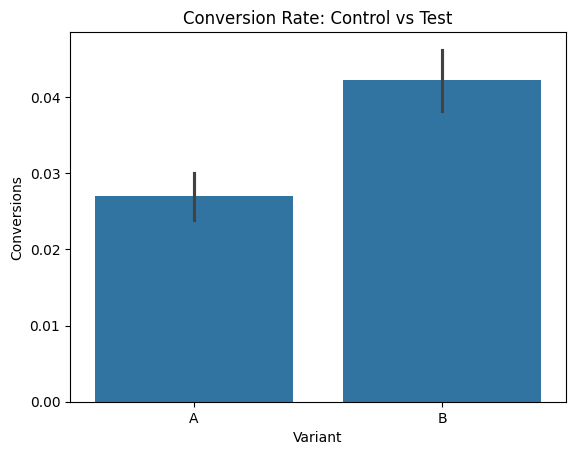

In [24]:
sns.barplot(x="Variant", y="Conversions", data=df)
plt.title("Conversion Rate: Control vs Test")
plt.show()


In [26]:
summary = pd.DataFrame({
    "Variant": ["Control", "Test"],
    "Conversion Rate": [control_mean, test_mean]
})

summary



,Variant,Conversion Rate
0,Control,0.0270
1,Test,0.0422
